I am learning regression. So I take very small data and try to learn how to perform linear regression where I take height column
as a independent variable and weight as a dependent and according to that I predict weight.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D://Top Mentor//ml//2 july linear regression//data.csv")

In [3]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


this is a very small data, so we know that there is not a null value here. but after loading a data firslty, we have to check is there any null value or not

In [4]:
import sklearn

In [5]:
#now we split the data using train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#now we give our independent data to x and dependent to y

In [8]:
x= df["Height"]
y=df["Weight"]

In [9]:
x.shape

(15,)

In [10]:
#now we independent data dimension from 1d to 2d

In [11]:
x = x.values.reshape(-1 , 1)    #Now trying to reshape with (-1, 1) . We have provided column as 1 but rows as unknown

In [12]:
x.shape

(15, 1)

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=65)
# test_size means we keep 80% data in train and 20% in test 

In [14]:
x_train.shape

(12, 1)

In [15]:
x_test.shape

(3, 1)

In [16]:
#now we creating a data frame for train and test

In [17]:
training_data = pd.DataFrame({"X_train":x_train.flatten(),"Y_train":y_train}) #flatten change 2d array to 1d

In [18]:
training_data.head()

,X_train,Y_train
3,1.55,55.84
10,1.73,66.28
0,1.47,52.21
1,1.50,53.12
9,1.70,64.47


In [19]:
test_data = pd.DataFrame({"X_test":x_test.flatten(),"Y_test":y_test})
test_data

,X_test,Y_test
2,1.52,54.48
4,1.57,57.20
11,1.75,68.10


know we use training data to train the alogrithm

In [20]:
#import the algorithm
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
#now we give data to alogrithm
lr.fit(x_train,y_train)                     #y=mx+c

LinearRegression()

In [23]:
#m value
lr.coef_

array([61.73616734])

In [24]:
#b value
lr.intercept_

-39.866204453441256

we just trained the model but we need to also check whether it trained properly or not
    

In [25]:
#making train predctions

In [26]:
y_train_predctions=lr.predict(x_train)

In [27]:
print(y_train_predctions)

[55.82485493 66.93736505 50.88596154 52.73804656 65.08528003 60.76374831
 70.02417341 61.99847166 71.25889676 63.85055668 58.91166329 73.11098178]


In [28]:
#now we add y_train predctions value to training data so we could compare easily

In [29]:
training_data["y_train_predctions"]=y_train_predctions

In [30]:
training_data

,X_train,Y_train,y_train_predctions
3,1.55,55.84,55.824855
10,1.73,66.28,66.937365
0,1.47,52.21,50.885962
1,1.50,53.12,52.738047
9,1.70,64.47,65.085280
6,1.63,59.93,60.763748
12,1.78,69.92,70.024173
7,1.65,61.29,61.998472
13,1.80,72.19,71.258897
8,1.68,63.11,63.850557



now we represent it in graph

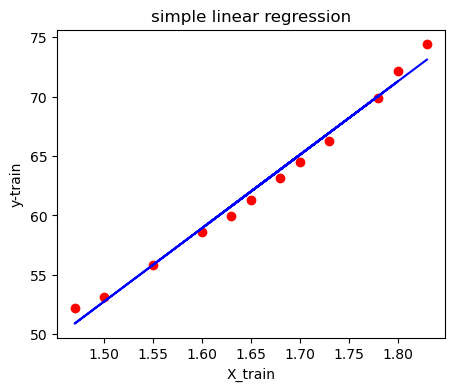

In [45]:
plt.figure(figsize=(5,4))
plt.scatter(x = x_train ,y=y_train,color='r')
plt.plot(x_train ,y_train_predctions , color = 'b')
plt.title('simple linear regression')
plt.xlabel('X_train')
plt.ylabel('y-train')
plt.show()

In [31]:
#now we find training loss and its accuracy

In [32]:
from sklearn.metrics import r2_score

In [33]:
#Accuracy
print(f'The training model Accuracy : {r2_score(y_train,y_train_predctions)}')

The training model Accuracy : 0.9872931007177655


In [34]:
#loss
print(f'The training model loss: {1-r2_score(y_train,y_train_predctions)}')

The training model loss: 0.012706899282234452


# Here our model is train, now we work with test data

In [35]:
test_data

,X_test,Y_test
2,1.52,54.48
4,1.57,57.20
11,1.75,68.10


In [36]:
test_data_predctions= lr.predict(x_test)

In [37]:
test_data_predctions

array([53.97276991, 57.05957827, 68.17208839])

In [38]:
test_data["test_data_predctions"]=test_data_predctions
test_data

,X_test,Y_test,test_data_predctions
2,1.52,54.48,53.972770
4,1.57,57.20,57.059578
11,1.75,68.10,68.172088


In [39]:
#Accuracy
print(f'The test model Accuracy : {r2_score(y_test,test_data_predctions)}')

The test model Accuracy : 0.9972840637264551


In [40]:
#Accuracy
print(f'The test model loss : {1-r2_score(y_test,test_data_predctions)}')

The test model loss : 0.002715936273544939


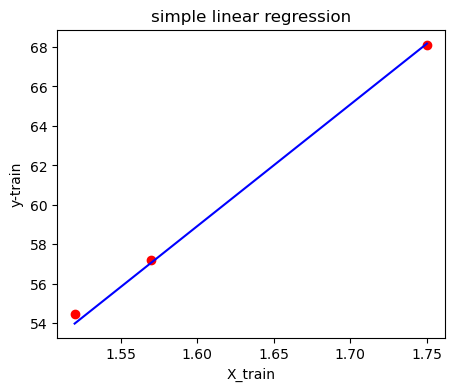

In [44]:
#now we draw a graph 

plt.figure(figsize=(5,4))
plt.scatter(x = x_test ,y=y_test,color='r')
plt.plot(x_test ,test_data_predctions , color = 'b')
plt.title('simple linear regression')
plt.xlabel('X_train')
plt.ylabel('y-train')
plt.show()

In [46]:
#now we predict our own value
lr.predict([[2.3]])

array([102.12698043])

In [47]:
lr.predict([[1.34]])

array([42.86025978])